<center>
<img src="https://cdn.megabonus.com/images/shop_logo/skillbox.png"/>
# Курс аналитик данных на Python  

## 2.2. Pandas basics.

[**Pandas**](http://pandas.pydata.org/pandas-docs/stable/) это пакет для статистической обработки данных, по функциональности близкий к R. <br>
Основные типы объектов это **Series** (~ вектор как в numpy с индексацией) и **DataFrame** (классическая таблица как мы ее знаем с индексацией)

In [10]:
import numpy as np
import pandas as pd

## Series

`Series` в это одномерный набор данных, по сути дела вектор.<br> 
Сгенерируем данные, пускай это будут показатели температуры на термометре за эту неделю<br>
Отсутствующий данные записываются как `np.nan` (в этот день мы забыли записать показания или в нашем термометре села батарейка).<br>
Пропущенные значения это по сути `None` и не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.<br>

In [11]:
l = [15,11,16,np.nan,14,13,12]
s = pd.Series(l)
s

0    15.0
1    11.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [12]:
type(s)

pandas.core.series.Series


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [13]:
s.describe()

count     6.000000
mean     13.500000
std       1.870829
min      11.000000
25%      12.250000
50%      13.500000
75%      14.750000
max      16.000000
dtype: float64

Можем проиндексироваться по нашему массиву.

In [14]:
s

0    15.0
1    11.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [15]:
s[5]

13.0

Можем исправить свои показания, тк выяснилось что мы ошиблись и 11 должно быть 17.

In [16]:
s[2]=17
s

0    15.0
1    11.0
2    17.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

Можем сделать срез, выбрать некое количество значений.

In [17]:
s[2:5]

2    17.0
3     NaN
4    14.0
dtype: float64

Можем создать новый объект без первого значения и без последнего.

In [18]:
s1=s[1:]
s1

1    11.0
2    17.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [19]:
s2=s[:-1]
s2

0    15.0
1    11.0
2    17.0
3     NaN
4    14.0
5    13.0
dtype: float64


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`. Однако смысла в такой операции тоже нет.

In [20]:
s1+s2

0     NaN
1    22.0
2    34.0
3     NaN
4    28.0
5    26.0
6     NaN
dtype: float64

К **Series** можно применять функции из `numpy`. 

**P.S.** Логарифм числа (например по основанию 2) это степень в которое нужно возвести основание, чтобы получить искомое число.

In [21]:
np.log2(s)

0    3.906891
1    3.459432
2    4.087463
3         NaN
4    3.807355
5    3.700440
6    3.584963
dtype: float64

Проверим себя, возведем полученное число в степень.

In [22]:
s

0    15.0
1    11.0
2    17.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [23]:
pow(2,3.700440)

13.000002539806442

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [24]:
list(s.index)

[0, 1, 2, 3, 4, 5, 6]


Но можно создавать наборы данных с индексом, заданным списком.

In [25]:
i = list('abcdefg')
i

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [26]:
s = pd.Series(l,index=i)
s

a    15.0
b    11.0
c    16.0
d     NaN
e    14.0
f    13.0
g    12.0
dtype: float64

И независимо от значений в индексе, мы можем индексироваться.

In [27]:
s['c']

16.0

Если индекс - строка, то вместо s['c'] можно индексироваться через точку.

In [28]:
s.c

16.0

Набор данных можно создать из словаря.

In [29]:
s = pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64


Можно отсортировать набор данных.

In [30]:
??s.sort_values()

Object `s.sort_values()` not found.


Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [31]:
d = pd.date_range('20181012',periods=10)
d

DatetimeIndex(['2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15',
               '2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19',
               '2018-10-20', '2018-10-21'],
              dtype='datetime64[ns]', freq='D')

Сгенерируем данные из нормального распределения.

In [32]:
s = pd.Series(np.random.normal(size=10),index=d)
s

2018-10-12    0.777694
2018-10-13   -1.339727
2018-10-14   -0.119449
2018-10-15   -0.716140
2018-10-16    1.272857
2018-10-17    1.160118
2018-10-18   -0.024487
2018-10-19    0.495899
2018-10-20    0.837826
2018-10-21   -0.846205
Freq: D, dtype: float64

Можем сравненивать возвращают наборы булевых данных.

In [33]:
s > 0

2018-10-12     True
2018-10-13    False
2018-10-14    False
2018-10-15    False
2018-10-16     True
2018-10-17     True
2018-10-18    False
2018-10-19     True
2018-10-20     True
2018-10-21    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [34]:
s[s > 0]

2018-10-12    0.777694
2018-10-16    1.272857
2018-10-17    1.160118
2018-10-19    0.495899
2018-10-20    0.837826
dtype: float64

Кумулятивные максимумы измеряют максимум от первого элемента до текущего, представте плавающее окно, которое каждый раз добавляет по одной дате и ищет максимум среди получившегося массива.

In [35]:
s.cummax()

2018-10-12    0.777694
2018-10-13    0.777694
2018-10-14    0.777694
2018-10-15    0.777694
2018-10-16    1.272857
2018-10-17    1.272857
2018-10-18    1.272857
2018-10-19    1.272857
2018-10-20    1.272857
2018-10-21    1.272857
Freq: D, dtype: float64


Кумулятивные суммы.

In [36]:
s = s.cumsum()
s

2018-10-12    0.777694
2018-10-13   -0.562033
2018-10-14   -0.681481
2018-10-15   -1.397621
2018-10-16   -0.124764
2018-10-17    1.035354
2018-10-18    1.010867
2018-10-19    1.506766
2018-10-20    2.344592
2018-10-21    1.498387
Freq: D, dtype: float64

Построим график наших данных. <br>
Для этого нам понадобится библиотека `matplotlib` и волшебная команда `%matplotlib inline` чтобы выводились только графики.

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


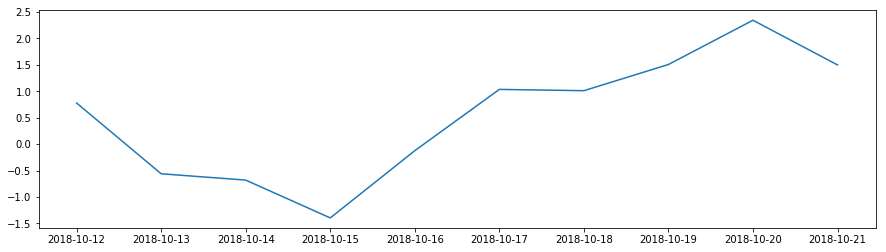

In [38]:
plt.figure(figsize=(15,4))
plt.plot(s)

## DataFrame

`DataFrame` это двумерная таблица данных. <br>
Имеет индекс и набор столбцов (возможно, имеющих разные типы). <br>
Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [39]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [40]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [41]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [42]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [43]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [44]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [45]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [46]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [47]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - название столбца.

In [48]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [49]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [50]:
df.loc['b','one']

2.0

In [51]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [52]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [53]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [54]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [55]:
del df['two']
df['foo']=0.
df

,one,three,flag,foo
a,1.0,1.0,False,0.0
b,2.0,4.0,False,0.0
c,3.0,9.0,True,0.0
d,NaN,NaN,True,0.0



Добавим копию столбца `one`, в которую входят только строки до второй.

In [56]:
df['one_tr']=df['one'][:2]
df

,one,three,flag,foo,one_tr
a,1.0,1.0,False,0.0,1.0
b,2.0,4.0,False,0.0,2.0
c,3.0,9.0,True,0.0,NaN
d,NaN,NaN,True,0.0,NaN


In [77]:
df.loc[2,3]=17
df

,A,B,C,D,2,"(2, 3)",3
0,0.658872,-0.534865,0.003916,-1.051278,17,17,NaN
1,-0.367912,-1.293761,0.365126,0.215701,17,17,NaN
2,-1.121229,0.000954,0.711337,0.505438,17,17,17.0
3,1.017374,0.411175,-1.981756,0.845756,17,17,NaN
4,-0.232816,-0.961066,-1.752860,0.269239,17,17,NaN
5,-0.396927,-1.126889,0.489844,0.038444,17,17,NaN
6,0.817955,-1.917198,0.437665,2.631896,17,17,NaN
7,-0.888309,0.769960,2.130362,0.507996,17,17,NaN
8,0.616505,-0.792171,-0.605962,-0.943788,17,17,NaN
9,-0.407784,-0.292860,0.879760,-0.794342,17,17,NaN


In [57]:
df=df.loc[:,['one','one_tr']]
df

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [58]:
df2=pd.DataFrame({'one':{'e':0,'f':1},'one_tr':{'e':2}})
df2

,one,one_tr
e,0,2.0
f,1,NaN


Объединим по столбцам.

In [59]:
pd.concat([df,df2], axis=0)

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN
e,0.0,2.0
f,1.0,NaN


In [60]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,two,three
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,3.0


Объединим по строкам.

In [61]:
pd.concat([df,df2],axis=1)

,one,one_tr,two,three
a,1.0,1.0,0.0,NaN
b,2.0,2.0,1.0,NaN
c,3.0,NaN,NaN,2.0
d,NaN,NaN,NaN,3.0



Создадим таблицу из массива случайных чисел.

In [62]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,0.658872,-0.534865,0.003916,-1.051278
1,-0.367912,-1.293761,0.365126,0.215701
2,-1.121229,0.000954,0.711337,0.505438
3,1.017374,0.411175,-1.981756,0.845756
4,-0.232816,-0.961066,-1.752860,0.269239
5,-0.396927,-1.126889,0.489844,0.038444
6,0.817955,-1.917198,0.437665,2.631896
7,-0.888309,0.769960,2.130362,0.507996
8,0.616505,-0.792171,-0.605962,-0.943788
9,-0.407784,-0.292860,0.879760,-0.794342


In [63]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,2.563920,-0.310459,1.431185,NaN
1,-2.979299,-2.341959,-0.543180,NaN
2,-0.269248,0.437505,1.645894,NaN
3,2.590841,0.120686,-0.384237,NaN
4,0.572253,-1.268524,-1.851266,NaN
5,-0.867794,-1.903686,-0.510770,NaN
6,0.626924,-1.583039,0.707111,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


Прошу заметить, что объекты **не изменяются пока мы их не перезапишем в явном виде**, например: `df = df+df2`

In [64]:
df

,A,B,C,D
0,0.658872,-0.534865,0.003916,-1.051278
1,-0.367912,-1.293761,0.365126,0.215701
2,-1.121229,0.000954,0.711337,0.505438
3,1.017374,0.411175,-1.981756,0.845756
4,-0.232816,-0.961066,-1.752860,0.269239
5,-0.396927,-1.126889,0.489844,0.038444
6,0.817955,-1.917198,0.437665,2.631896
7,-0.888309,0.769960,2.130362,0.507996
8,0.616505,-0.792171,-0.605962,-0.943788
9,-0.407784,-0.292860,0.879760,-0.794342


In [65]:
2*df+3

,A,B,C,D
0,4.317745,1.930271,3.007832,0.897443
1,2.264176,0.412478,3.730252,3.431402
2,0.757542,3.001907,4.422673,4.010875
3,5.034748,3.822351,-0.963512,4.691512
4,2.534368,1.077869,-0.505720,3.538478
5,2.206145,0.746222,3.979689,3.076888
6,4.635911,-0.834397,3.875331,8.263792
7,1.223381,4.539920,7.260725,4.015992
8,4.233010,1.415658,1.788076,1.112424
9,2.184432,2.414280,4.759520,1.411317


In [66]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.030427,-0.573672,0.067743,0.222506
std,0.750458,0.817400,1.233983,1.075382
min,-1.121229,-1.917198,-1.981756,-1.051278
25%,-0.405070,-1.085433,-0.453492,-0.586145
50%,-0.300364,-0.663518,0.401396,0.242470
75%,0.648281,-0.072500,0.655963,0.507356
max,1.017374,0.769960,2.130362,2.631896


Можем отсортировать по значениям в колонке.

In [78]:
df.sort_values(by='C')
df

,A,B,C,D,2,"(2, 3)",3
0,0.658872,-0.534865,0.003916,-1.051278,17,17,NaN
1,-0.367912,-1.293761,0.365126,0.215701,17,17,NaN
2,-1.121229,0.000954,0.711337,0.505438,17,17,17.0
3,1.017374,0.411175,-1.981756,0.845756,17,17,NaN
4,-0.232816,-0.961066,-1.752860,0.269239,17,17,NaN
5,-0.396927,-1.126889,0.489844,0.038444,17,17,NaN
6,0.817955,-1.917198,0.437665,2.631896,17,17,NaN
7,-0.888309,0.769960,2.130362,0.507996,17,17,NaN
8,0.616505,-0.792171,-0.605962,-0.943788,17,17,NaN
9,-0.407784,-0.292860,0.879760,-0.794342,17,17,NaN


Атрибут iloc подобен loc: первый индекс - индекс строки, второй - индекс столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [68]:
df.iloc[2]

A   -1.121229
B    0.000954
C    0.711337
D    0.505438
Name: 2, dtype: float64

In [69]:
df.iloc[1:3, 0:2]

,A,B
1,-0.367912,-1.293761
2,-1.121229,0.000954


In [62]:
df.iloc[1:3,0:2]

,A,B
1,0.512577,-1.393669
2,0.561812,1.300280


Посчитаем кумулятивные суммы.

In [63]:
cs=df.cumsum()
cs

,A,B,C,D
0,1.047675,-1.143840,1.487666,-0.795390
1,1.560251,-2.537509,1.717471,-0.166060
2,2.122063,-1.237229,1.493688,-1.218233
3,0.584522,0.399596,1.913824,-1.115914
4,0.196957,1.812128,1.497581,-1.839491
5,-1.420388,2.000346,-0.087513,-0.853176
6,-1.166299,1.429575,1.101234,-0.342197
7,0.457033,2.791876,0.813252,-1.547587
8,0.659908,3.173387,2.633269,-0.669713
9,0.385837,3.589573,4.361652,-1.426359


И построим график.

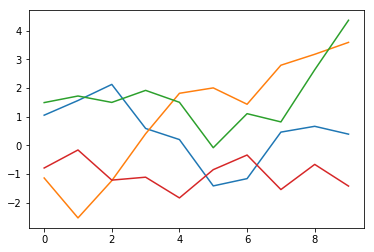

In [64]:
plt.plot(cs)

## Чтение файлов

Так как основная форма обмена информации это таблицы, то нужно научиться загружать их и записывать.<br>
В `Pandas` есть удобные методы для чтения`.read_csv()`/`.read_excel()`/`.read_table()` и `.to_csv()`/`.to_excel()`

Прочитаем файл и вглянем на его.

In [65]:
data = pd.read_csv('../data/bank.csv',sep=';')

In [66]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [70]:
data = pd.read_csv('../data/bank.xlsx',sep=';')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 1: invalid continuation byte

In [71]:
data = pd.read_excel('../data/bikes_rent.xls')

In [72]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,6,0,2,985
1,1,0,1,0,0,0,2,801
2,1,0,1,0,1,1,1,1349
3,1,0,1,0,2,1,1,1562
4,1,0,1,0,3,1,1,1600


Создами колонку с кумулятивной суммой поездок.

In [73]:
data['cum_sum'] = data['cnt'].cumsum()

In [74]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt,cum_sum
0,1,0,1,0,6,0,2,985,985
1,1,0,1,0,0,0,2,801,1786
2,1,0,1,0,1,1,1,1349,3135
3,1,0,1,0,2,1,1,1562,4697
4,1,0,1,0,3,1,1,1600,6297


Перезапишем наш файл.

In [75]:
data.to_csv('../data/bikes_rent.csv', index=False)

С запись в экселевский формат немного длиннее. Сначало нам нужно создать объект, который будет записывать файл и в него передать нашу таблицу.

In [76]:
writer = pd.ExcelWriter('bikes_rent.xlsx')
data.to_excel(writer, sheet_name ='bikes_rent_sheet')